# **Jack CCC**

1. Yusfian Braman Tio
2. Dwi Prasetya Mumtaz
3. Dhani Syafreal

## **Business Understanding**



Business Understanding:
Proyek ini bertujuan melakukan segmentasi UMKM menggunakan K-Means clustering. Segmentasi ini diharapkan membantu pemerintah/instansi/lembaga untuk menentukan strategi yang tepat, misalnya penyaluran bantuan, pelatihan, atau pemasaran berbasis karakteristik masing-masing cluster.

## **Data Understanding**

### Menyiapkan library yang dibutuhkan

In [113]:
!pip install pandas
!pip install numpy
!pip install gdown
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import drive
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


In [115]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13408 non-null  Int64 
 4   tenaga_kerja_laki_laki  13429 non-null  Int64 
 5   aset                    13422 non-null  Int64 
 6   omset                   13423 non-null  Int64 
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13400 non-null  Int64 
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13436 non-null  Int64 
 11  laba                    13407 non-null  Int64 
 12  biaya_karyawan          13430 non-null  Int64 
 13  jumlah_pelanggan        13412 non-null  Int64 
dtypes: Int64(9), object(5)
memory usage: 1.6+ MB


<IPython.core.display.HTML object>

,Ringkasan
Total Data,13564
Jenis Usaha Terbanyak,jasa
Jumlah Jenis Usaha,9
Status Legalitas Terdaftar (%),50.84046
Rata-rata Aset,5223369.174639
Median Aset,5211246.5
Min Aset,500233
Max Aset,9999760
Rata-rata Omset,25556075.975192
Median Omset,25611802.0


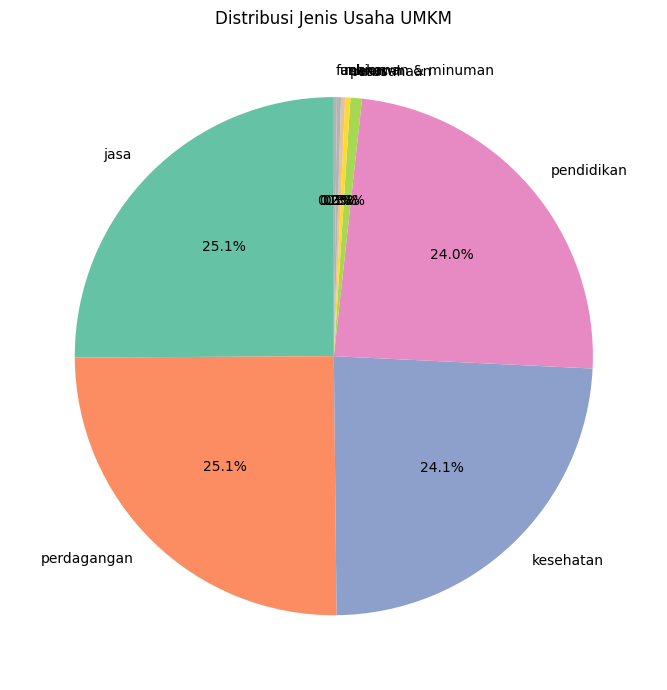

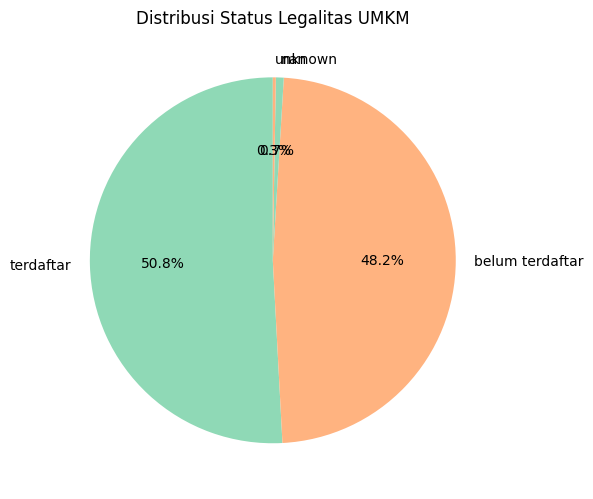

<ipython-input-116-8a49a491fc6a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')


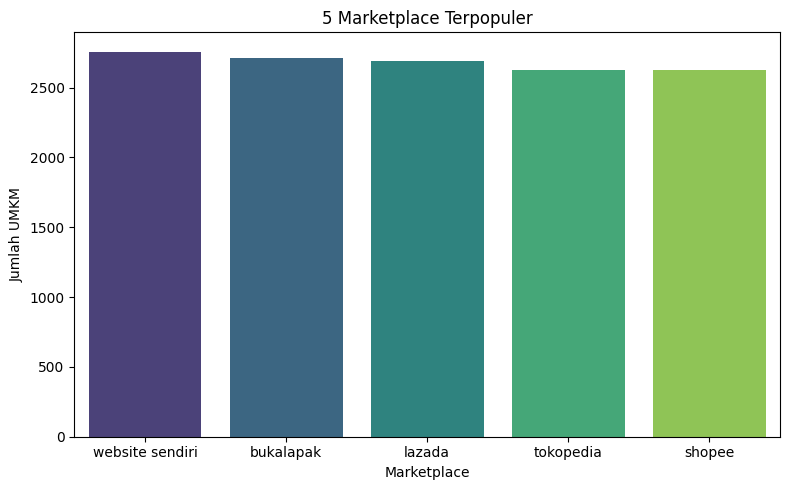

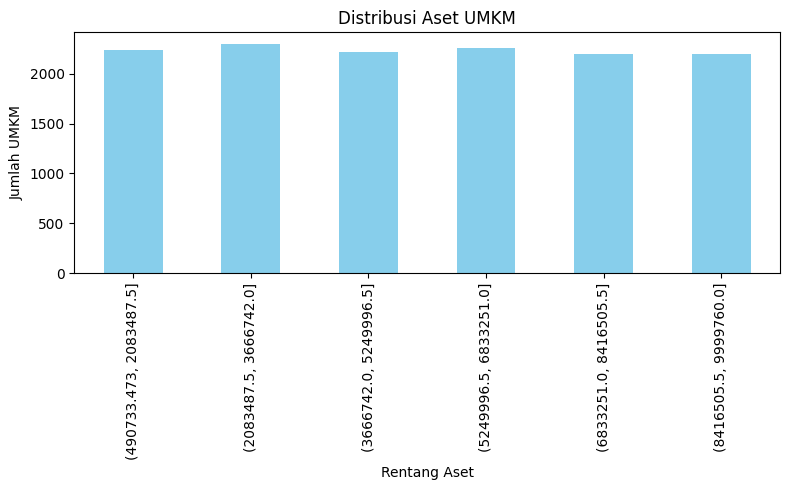

In [116]:
file_path = '/content/drive/MyDrive/disco/dataset.csv'
umkm = pd.read_csv(file_path)

# merubah tipe data fitur dari object menjadi numerik
cols_to_convert = ['tenaga_kerja_perempuan','tenaga_kerja_laki_laki','aset', 'omset','kapasitas_produksi',
                   'tahun_berdiri','laba','biaya_karyawan', 'jumlah_pelanggan' ]

for col in cols_to_convert:
    umkm[col] = pd.to_numeric(umkm[col], errors='coerce').astype('Int64')

display(HTML(umkm.info()))

# Ubah ke lower dan strip (untuk konsistensi string)
umkm['jenis_usaha'] = umkm['jenis_usaha'].astype(str).str.lower().str.strip()
umkm['status_legalitas'] = umkm['status_legalitas'].astype(str).str.lower().str.strip()
umkm['marketplace'] = umkm['marketplace'].astype(str).str.lower().str.strip()

summary = {
    "Total Data": [len(umkm)],
    "Jenis Usaha Terbanyak": [umkm['jenis_usaha'].value_counts().idxmax()],
    "Jumlah Jenis Usaha": [umkm['jenis_usaha'].nunique()],
    "Status Legalitas Terdaftar (%)": [umkm['status_legalitas'].value_counts(normalize=True).get('terdaftar',0)*100],
    "Rata-rata Aset": [umkm['aset'].mean()],
    "Median Aset": [umkm['aset'].median()],
    "Min Aset": [umkm['aset'].min()],
    "Max Aset": [umkm['aset'].max()],
    "Rata-rata Omset": [umkm['omset'].mean()],
    "Median Omset": [umkm['omset'].median()],
    "Min Omset": [umkm['omset'].min()],
    "Max Omset": [umkm['omset'].max()],
    "Rata-rata TK Perempuan": [umkm['tenaga_kerja_perempuan'].mean()],
    "Rata-rata TK Laki-laki": [umkm['tenaga_kerja_laki_laki'].mean()],
    "Marketplace Terpopuler": [umkm['marketplace'].value_counts().idxmax()],
    "Tahun Berdiri Median": [umkm['tahun_berdiri'].median()],
    "Tahun Berdiri Min": [umkm['tahun_berdiri'].min()],
    "Tahun Berdiri Max": [umkm['tahun_berdiri'].max()],
}
summary_df = pd.DataFrame(summary).T
summary_df.columns = ['Ringkasan']
display(summary_df)

# Distribusi Jenis Usaha
plt.figure(figsize=(7,7))
umkm['jenis_usaha'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribusi Jenis Usaha UMKM')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Status Legalitas
plt.figure(figsize=(6,6))
umkm['status_legalitas'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#8fd9b6','#ffb380'])
plt.title('Distribusi Status Legalitas UMKM')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Marketplace Terpopuler
plt.figure(figsize=(8,5))
top_marketplace = umkm['marketplace'].value_counts().head(5)
sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')
plt.title('5 Marketplace Terpopuler')
plt.xlabel('Marketplace')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

# Distribusi Aset
plt.figure(figsize=(8,5))
bins_aset = pd.cut(umkm['aset'], bins=6)
aset_counts = bins_aset.value_counts().sort_index()
aset_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Aset UMKM')
plt.xlabel('Rentang Aset')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/masked.py:672: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs2, **kwargs)


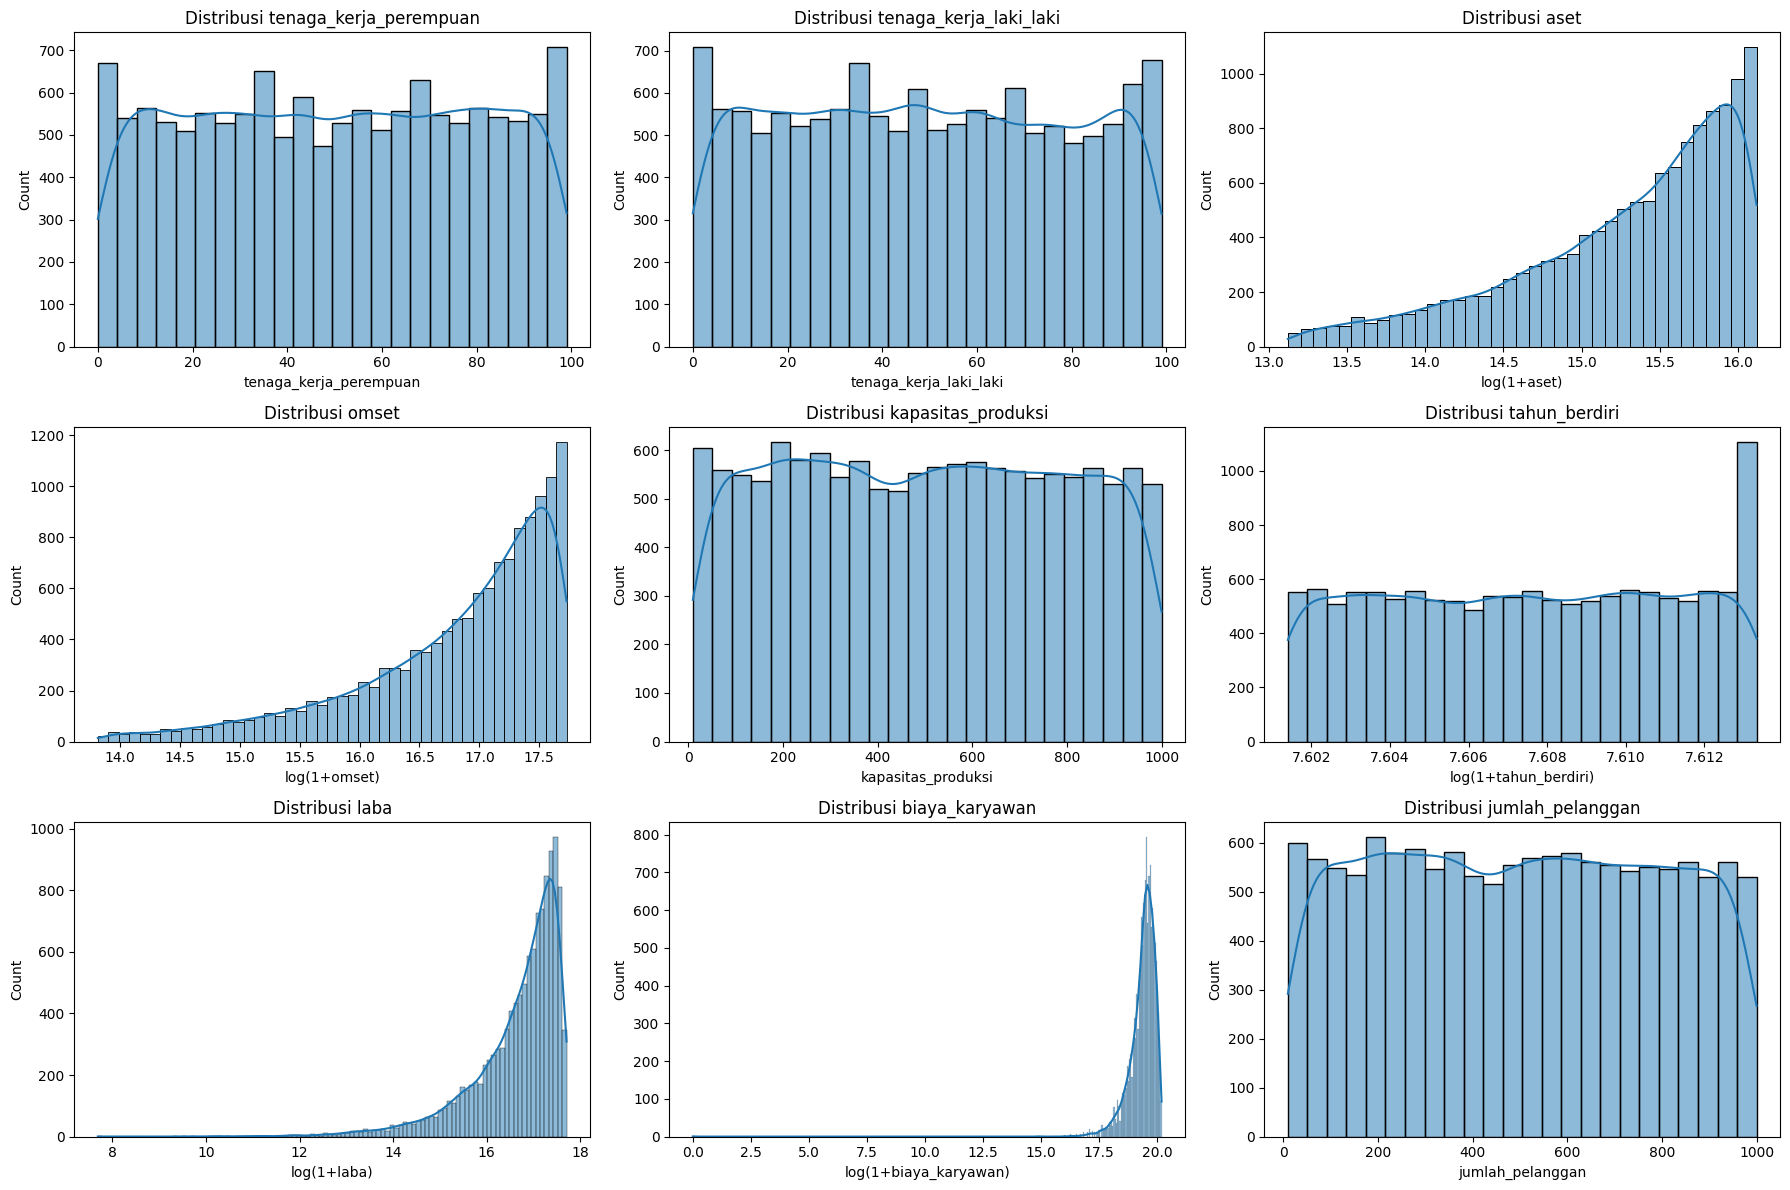

In [117]:
numerical_cols = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan',
    'jumlah_pelanggan'
]

# Plot distribusi setiap fitur numerik
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    data = pd.to_numeric(umkm[col], errors='coerce').dropna()
    if data.max() > 1000:
        sns.histplot(np.log1p(data), kde=True)
        plt.xlabel(f'log(1+{col})')
    else:
        sns.histplot(data, kde=True)
        plt.xlabel(col)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

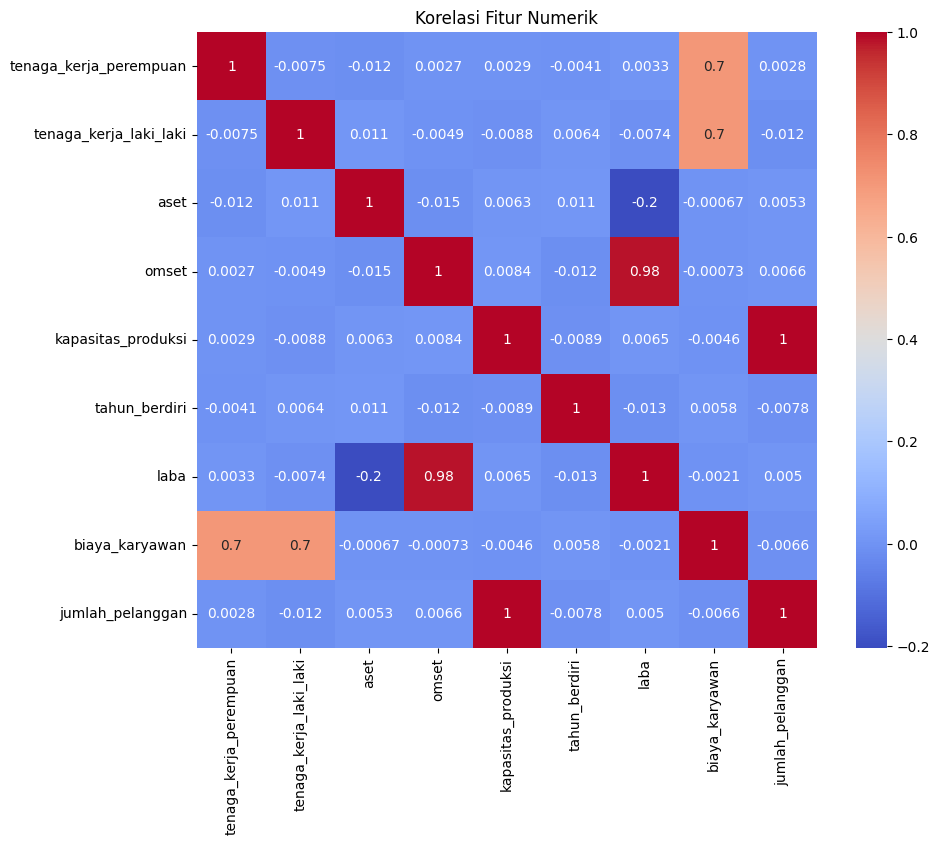

In [118]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10,8))
sns.heatmap(umkm.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

In [119]:
cols = umkm.columns
for col in cols:
    missing_count = umkm[col].isnull().sum()  # NaN atau kosong
    unknown_count = (umkm[col].astype(str).str.lower().str.strip() == 'unknown').sum()  # unknown (tidak case sensitive)
    empty_count = (umkm[col].astype(str).str.strip() == '').sum()  # string kosong
    print(f"{col}: NaN/kosong={missing_count}, 'unknown'={unknown_count}, empty string={empty_count}")

id_umkm: NaN/kosong=97, 'unknown'=29, empty string=0
nama_usaha: NaN/kosong=0, 'unknown'=0, empty string=0
jenis_usaha: NaN/kosong=0, 'unknown'=34, empty string=0
tenaga_kerja_perempuan: NaN/kosong=156, 'unknown'=0, empty string=0
tenaga_kerja_laki_laki: NaN/kosong=135, 'unknown'=0, empty string=0
aset: NaN/kosong=142, 'unknown'=0, empty string=0
omset: NaN/kosong=141, 'unknown'=0, empty string=0
marketplace: NaN/kosong=0, 'unknown'=36, empty string=0
kapasitas_produksi: NaN/kosong=164, 'unknown'=0, empty string=0
status_legalitas: NaN/kosong=0, 'unknown'=36, empty string=0
tahun_berdiri: NaN/kosong=128, 'unknown'=0, empty string=0
laba: NaN/kosong=157, 'unknown'=0, empty string=0
biaya_karyawan: NaN/kosong=134, 'unknown'=0, empty string=0
jumlah_pelanggan: NaN/kosong=152, 'unknown'=0, empty string=0


## **Data Preparation**

### Data Cleaning

In [120]:
for col in ['jenis_usaha', 'marketplace', 'status_legalitas']:
    umkm[col] = umkm[col].astype(str).str.lower().str.strip()

# Replace 'unknown' dan 'nan'
umkm = umkm.replace({'unknown': np.nan, 'nan': np.nan})

cols_to_convert = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan', 'jumlah_pelanggan'
]
for col in cols_to_convert:
    umkm[col] = pd.to_numeric(umkm[col], errors='coerce')


print("\n== Audit Data Setelah Cleaning ==")
for col in cols:
    missing_count = umkm[col].isnull().sum()
    print(f"{col}: NaN/kosong={missing_count}")

# Drop missing value
kolom_penting = [
    'id_umkm', 'jenis_usaha', 'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki',
    'aset', 'omset', 'marketplace', 'kapasitas_produksi', 'status_legalitas',
    'tahun_berdiri', 'laba', 'biaya_karyawan', 'jumlah_pelanggan'
]
umkm_clean = umkm.dropna(subset=kolom_penting).reset_index(drop=True)

# Hapus outlier pada kolom numerik
for col in cols_to_convert:
    Q1 = umkm_clean[col].astype(float).quantile(0.25)
    Q3 = umkm_clean[col].astype(float).quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (umkm_clean[col].astype(float) < Q1 - 1.5*IQR) | (umkm_clean[col].astype(float) > Q3 + 1.5*IQR)
    umkm_clean = umkm_clean[~outlier_mask].reset_index(drop=True)


== Audit Data Setelah Cleaning ==
id_umkm: NaN/kosong=126
nama_usaha: NaN/kosong=0
jenis_usaha: NaN/kosong=131
tenaga_kerja_perempuan: NaN/kosong=156
tenaga_kerja_laki_laki: NaN/kosong=135
aset: NaN/kosong=142
omset: NaN/kosong=141
marketplace: NaN/kosong=153
kapasitas_produksi: NaN/kosong=164
status_legalitas: NaN/kosong=130
tahun_berdiri: NaN/kosong=128
laba: NaN/kosong=157
biaya_karyawan: NaN/kosong=134
jumlah_pelanggan: NaN/kosong=152


### Data Description


== Data Description Setelah Preparation ==


,Ringkasan (Setelah Preparation)
Total Data,11753
Jumlah Jenis Usaha,7
Rata-rata Aset,5229678.681613
Median Aset,5217634.0
Rata-rata Omset,25614166.665107
Median Omset,25680958.0
Rata-rata TK Perempuan,49.651748
Rata-rata TK Laki-laki,49.14022
Marketplace Terpopuler,website sendiri
Tahun Berdiri Median,2012.0


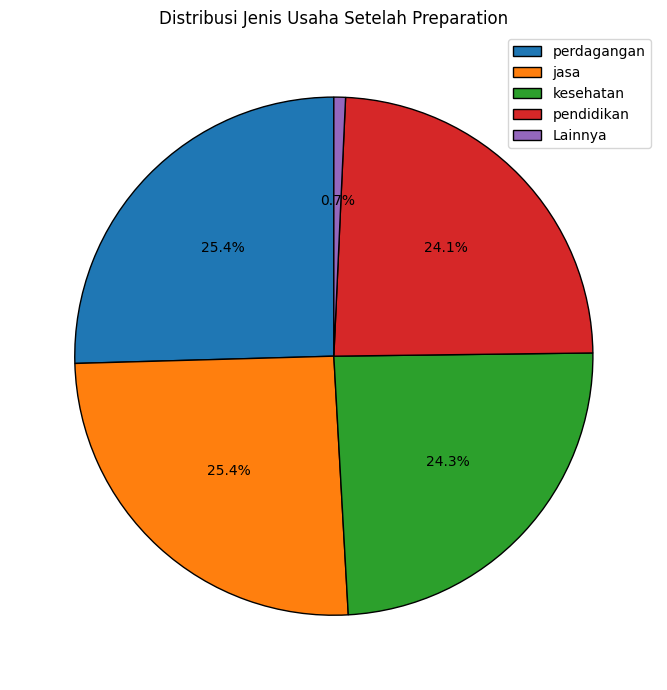

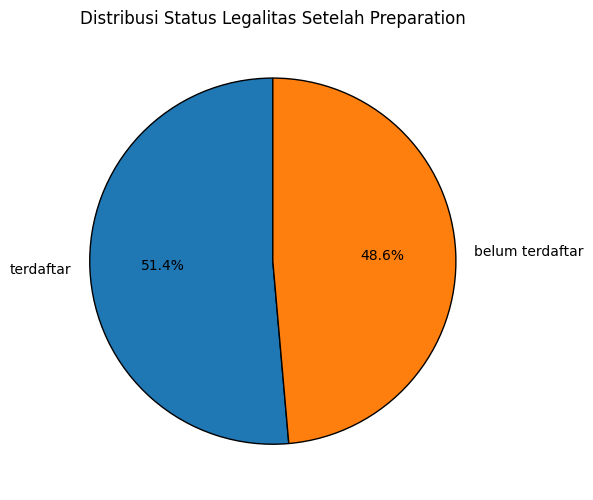

<ipython-input-121-e5e274721e4d>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')


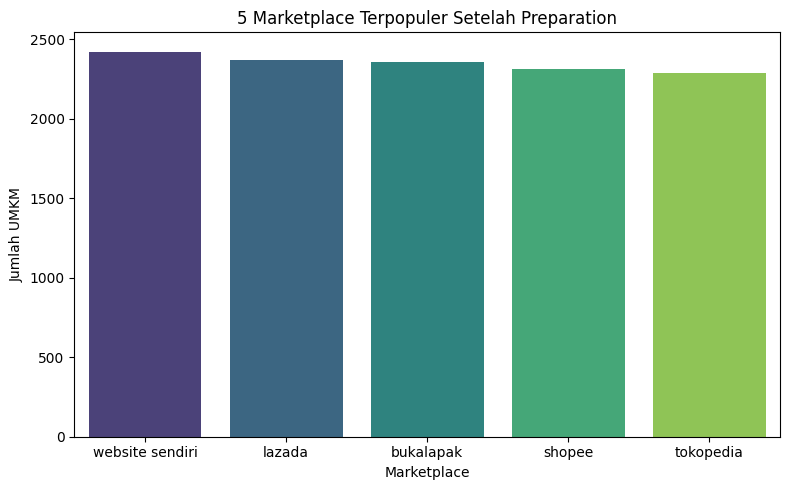

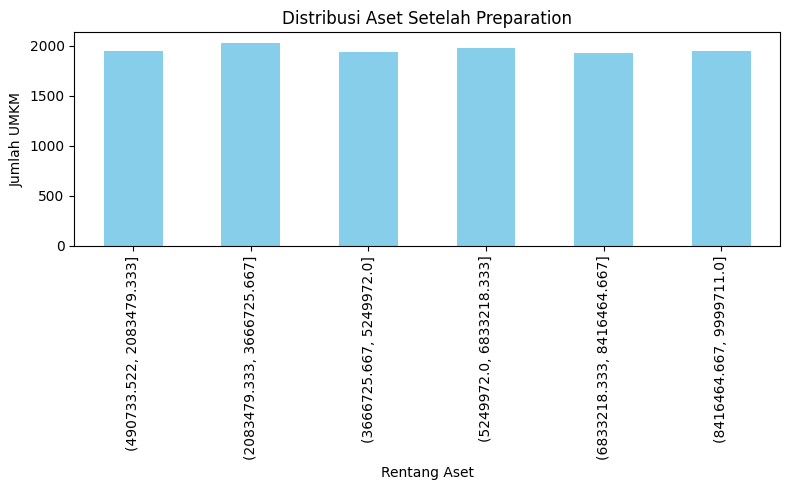

In [121]:
print("\n== Data Description Setelah Preparation ==")
summary = {
    "Total Data": [len(umkm_clean)],
    "Jumlah Jenis Usaha": [umkm_clean['jenis_usaha'].nunique()],
    "Rata-rata Aset": [umkm_clean['aset'].mean()],
    "Median Aset": [umkm_clean['aset'].median()],
    "Rata-rata Omset": [umkm_clean['omset'].mean()],
    "Median Omset": [umkm_clean['omset'].median()],
    "Rata-rata TK Perempuan": [umkm_clean['tenaga_kerja_perempuan'].mean()],
    "Rata-rata TK Laki-laki": [umkm_clean['tenaga_kerja_laki_laki'].mean()],
    "Marketplace Terpopuler": [umkm_clean['marketplace'].value_counts().idxmax()],
    "Tahun Berdiri Median": [umkm_clean['tahun_berdiri'].median()]
}
summary_df = pd.DataFrame(summary).T
summary_df.columns = ['Ringkasan (Setelah Preparation)']
display(summary_df)


def plot_pie_kategori_ringkas(series, threshold=0.05, title=''):
    """
    Menampilkan pie chart dengan kategori kecil (<threshold) digabung ke 'Lainnya'.
    """
    counts = series.value_counts()
    percent = counts / counts.sum()
    small_cats = percent[percent < threshold].index
    series_plot = series.apply(lambda x: 'Lainnya' if x in small_cats else x)
    plot_counts = series_plot.value_counts()

    plt.figure(figsize=(7,7))
    wedges, texts, autotexts = plt.pie(
        plot_counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'k'}
    )
    plt.title(title)
    plt.legend(plot_counts.index, loc="best")
    plt.tight_layout()
    plt.show()

plot_pie_kategori_ringkas(
    umkm_clean['jenis_usaha'],
    threshold=0.05,
    title="Distribusi Jenis Usaha Setelah Preparation"
)

plt.figure(figsize=(6,6))
umkm_clean['status_legalitas'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'k'}
)
plt.title('Distribusi Status Legalitas Setelah Preparation')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
top_marketplace = umkm_clean['marketplace'].value_counts().head(5)
sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')
plt.title('5 Marketplace Terpopuler Setelah Preparation')
plt.xlabel('Marketplace')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
bins_aset = pd.cut(umkm_clean['aset'], bins=6)
aset_counts = bins_aset.value_counts().sort_index()
aset_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Aset Setelah Preparation')
plt.xlabel('Rentang Aset')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

In [122]:
# Jumlah data setelah cleaning
print(f"Jumlah data setelah cleaning: {len(umkm_clean)}")

# Info missing value setelah cleaning
print("\nJumlah missing value per kolom setelah cleaning:")
missing_per_col = umkm_clean.isnull().sum()
print(missing_per_col)

numeric_cols = umkm_clean.select_dtypes(include=[np.number]).columns
outlier_info = {}
for col in numeric_cols:
    Q1 = umkm_clean[col].quantile(0.25)
    Q3 = umkm_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((umkm_clean[col] < lower) | (umkm_clean[col] > upper)).sum()
    outlier_info[col] = outliers

print("\nJumlah data outlier per kolom numerik (IQR):")
for col, n in outlier_info.items():
    print(f"{col}: {n}")

Jumlah data setelah cleaning: 11753

Jumlah missing value per kolom setelah cleaning:
id_umkm                   0
nama_usaha                0
jenis_usaha               0
tenaga_kerja_perempuan    0
tenaga_kerja_laki_laki    0
aset                      0
omset                     0
marketplace               0
kapasitas_produksi        0
status_legalitas          0
tahun_berdiri             0
laba                      0
biaya_karyawan            0
jumlah_pelanggan          0
dtype: int64

Jumlah data outlier per kolom numerik (IQR):
tenaga_kerja_perempuan: 0
tenaga_kerja_laki_laki: 0
aset: 0
omset: 0
kapasitas_produksi: 0
tahun_berdiri: 0
laba: 0
biaya_karyawan: 0
jumlah_pelanggan: 0


### Data Transformation

In [123]:
umkm_clean['jenis_usaha'] = umkm_clean['jenis_usaha'].str.lower().str.strip()
umkm_clean['marketplace'] = umkm_clean['marketplace'].str.lower().str.strip()
umkm_clean['status_legalitas'] = umkm_clean['status_legalitas'].str.lower().str.strip()

jenis_usaha_map = {
    'fashion': 0,
    'jasa': 1,
    'kesehatan': 2,
    'makanan & minuman': 3,
    'pendidikan': 4,
    'perdagangan': 5,
    'perusahaan': 6
}
marketplace_map = {
    'bukalapak': 0,
    'lazada': 1,
    'shopee': 2,
    'tokopedia': 3,
    'website sendiri': 4
}
status_legalitas_map = {
    'belum terdaftar': 0,
    'terdaftar': 1
}

# Label encoding manual
umkm_clean['jenis_usaha_encoded'] = umkm_clean['jenis_usaha'].map(jenis_usaha_map)
umkm_clean['marketplace_encoded'] = umkm_clean['marketplace'].map(marketplace_map)
umkm_clean['status_legalitas_encoded'] = umkm_clean['status_legalitas'].map(status_legalitas_map)


def show_html_table(df, title):
    display(HTML(f"<h4>{title}</h4>"))
    display(HTML(df.to_html(index=False)))

# Jenis Usaha
df_jenis = umkm_clean[['jenis_usaha', 'jenis_usaha_encoded']].drop_duplicates().sort_values('jenis_usaha_encoded').reset_index(drop=True)
show_html_table(df_jenis, "Mapping Jenis Usaha")

# Marketplace
df_market = umkm_clean[['marketplace', 'marketplace_encoded']].drop_duplicates().sort_values('marketplace_encoded').reset_index(drop=True)
show_html_table(df_market, "Mapping Marketplace")

# Status Legalitas
df_legal = umkm_clean[['status_legalitas', 'status_legalitas_encoded']].drop_duplicates().sort_values('status_legalitas_encoded').reset_index(drop=True)
show_html_table(df_legal, "Mapping Status Legalitas")


umkm_final = umkm_clean.drop(['jenis_usaha', 'marketplace', 'status_legalitas'], axis=1)
umkm_final = umkm_final.rename(columns={
    'jenis_usaha_encoded': 'jenis_usaha',
    'marketplace_encoded': 'marketplace',
    'status_legalitas_encoded': 'status_legalitas'
})

jenis_usaha,jenis_usaha_encoded
fashion,0
jasa,1
kesehatan,2
makanan & minuman,3
pendidikan,4
perdagangan,5
perusahaan,6


marketplace,marketplace_encoded
bukalapak,0
lazada,1
shopee,2
tokopedia,3
website sendiri,4


status_legalitas,status_legalitas_encoded
belum terdaftar,0
terdaftar,1


### Normalisasi

In [124]:
# Fitur yang dipakai
fitur_clustering = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan',
    'jumlah_pelanggan', 'jenis_usaha', 'marketplace', 'status_legalitas'
]

# Normalisasi
scaler = MinMaxScaler()
umkm_final[fitur_clustering] = scaler.fit_transform(umkm_final[fitur_clustering])

display(umkm_final.head())

,id_umkm,nama_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,jenis_usaha,marketplace,status_legalitas
0,28828567,UD. Alif Pamungkas,0.010101,0.565657,0.526020,0.047905,0.474216,0.625000,0.115260,0.287879,0.474216,0.333333,0.75,0.0
1,28828568,UD. Zidanar Panji,0.050505,0.444444,0.726161,0.795302,0.459050,0.583333,0.713498,0.247475,0.459050,0.833333,0.00,1.0
2,28828570,UD. Damaris Satria,0.898990,0.050505,0.955415,0.402045,0.986855,0.125000,0.343964,0.474747,0.986855,0.166667,1.00,0.0
3,28828571,UD. Qasya Wiratama,0.919192,0.595960,0.942854,0.077967,0.307381,0.083333,0.072414,0.757576,0.307381,0.166667,0.25,0.0
4,28828572,UD. Grego Wiraatmaja Nara,0.767677,0.363636,0.902353,0.373410,0.658241,0.000000,0.328474,0.565657,0.658241,0.166667,0.00,0.0


## **Modeling**

### Elbow method & silhouette score

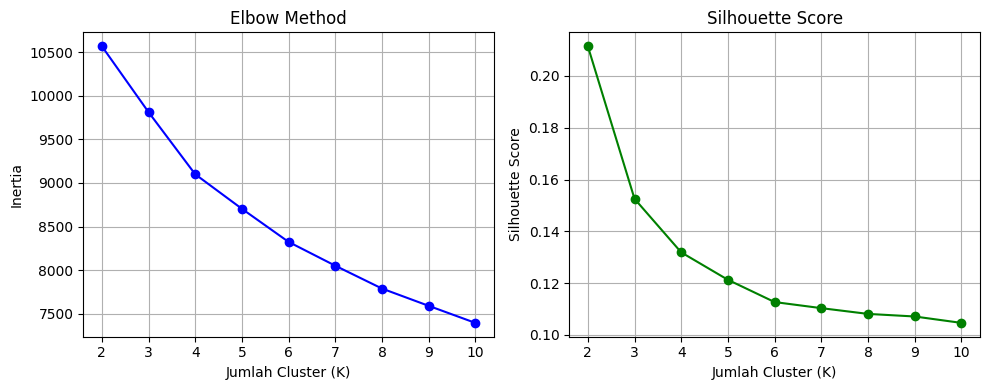

In [125]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
X = umkm_final[fitur_clustering]

# Elbow Method & Silhouette Score untuk pilih K terbaik
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
inertia_df = pd.DataFrame({
    'Jumlah Cluster (K)': list(K_range),
    'Inertia': inertia
})
display(inertia_df)

,Jumlah Cluster (K),Inertia
0,2,10569.425872
1,3,9812.841279
2,4,9099.925223
3,5,8703.765294
4,6,8323.710161
5,7,8050.686089
6,8,7788.607040
7,9,7590.420878
8,10,7394.622491


In [127]:
# Pilih K=3 (berdasarkan elbow/silhouette)
K_optimal = 3
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
umkm_final['cluster'] = kmeans_final.fit_predict(X)

display(umkm_final.head())

,id_umkm,nama_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,jenis_usaha,marketplace,status_legalitas,cluster
0,28828567,UD. Alif Pamungkas,0.010101,0.565657,0.526020,0.047905,0.474216,0.625000,0.115260,0.287879,0.474216,0.333333,0.75,0.0,1
1,28828568,UD. Zidanar Panji,0.050505,0.444444,0.726161,0.795302,0.459050,0.583333,0.713498,0.247475,0.459050,0.833333,0.00,1.0,0
2,28828570,UD. Damaris Satria,0.898990,0.050505,0.955415,0.402045,0.986855,0.125000,0.343964,0.474747,0.986855,0.166667,1.00,0.0,1
3,28828571,UD. Qasya Wiratama,0.919192,0.595960,0.942854,0.077967,0.307381,0.083333,0.072414,0.757576,0.307381,0.166667,0.25,0.0,1
4,28828572,UD. Grego Wiraatmaja Nara,0.767677,0.363636,0.902353,0.373410,0.658241,0.000000,0.328474,0.565657,0.658241,0.166667,0.00,0.0,1


In [128]:
display(HTML(umkm_final.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 11753 non-null  object 
 1   nama_usaha              11753 non-null  object 
 2   tenaga_kerja_perempuan  11753 non-null  float64
 3   tenaga_kerja_laki_laki  11753 non-null  float64
 4   aset                    11753 non-null  float64
 5   omset                   11753 non-null  float64
 6   kapasitas_produksi      11753 non-null  float64
 7   tahun_berdiri           11753 non-null  float64
 8   laba                    11753 non-null  float64
 9   biaya_karyawan          11753 non-null  float64
 10  jumlah_pelanggan        11753 non-null  float64
 11  jenis_usaha             11753 non-null  float64
 12  marketplace             11753 non-null  float64
 13  status_legalitas        11753 non-null  float64
 14  cluster                 11753 non-null

<IPython.core.display.HTML object>

### Deskripsi Cluster

In [129]:
jenis_usaha_map = {
    'fashion': 0,
    'jasa': 1,
    'kesehatan': 2,
    'makanan & minuman': 3,
    'pendidikan': 4,
    'perdagangan': 5,
    'perusahaan': 6
}

marketplace_map = {
    'bukalapak': 0,
    'lazada': 1,
    'shopee': 2,
    'tokopedia': 3,
    'website sendiri': 4
}

status_legalitas_map = {
    'belum terdaftar': 0,
    'terdaftar': 1
}

fitur_desc_numerik = [
    'aset', 'omset', 'laba', 'jumlah_pelanggan',
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki',
    'kapasitas_produksi', 'tahun_berdiri'
]
fitur_desc_kategorikal = {
    'jenis_usaha': jenis_usaha_map,
    'marketplace': marketplace_map,
    'status_legalitas': status_legalitas_map
}

print("Penjelasan:\n")
for cl in sorted(umkm_final['cluster'].unique()):
    cluster_data = umkm_final[umkm_final['cluster'] == cl]
    mean_vals = cluster_data[fitur_desc_numerik].mean()
    highlight = []

    if mean_vals['aset'] > umkm_final['aset'].mean():
        highlight.append("aset besar")
    else:
        highlight.append("aset kecil")
    if mean_vals['omset'] > umkm_final['omset'].mean():
        highlight.append("omset besar")
    else:
        highlight.append("omset kecil")

    total_tk = mean_vals['tenaga_kerja_perempuan'] + mean_vals['tenaga_kerja_laki_laki']
    avg_tk = umkm_final['tenaga_kerja_perempuan'].mean() + umkm_final['tenaga_kerja_laki_laki'].mean()
    if total_tk > avg_tk:
        highlight.append("tenaga kerja banyak")
    else:
        highlight.append("tenaga kerja sedikit")

    if mean_vals['tahun_berdiri'] < umkm_final['tahun_berdiri'].mean():
        highlight.append("UMKM lama")
    else:
        highlight.append("UMKM baru")

    # Kategorikal
    for cat, cat_map in fitur_desc_kategorikal.items():
        if not cluster_data[cat].mode().empty:
            kode = int(cluster_data[cat].mode().iloc[0])
            nama = cat_map.get(kode, f"Kode {kode}")
            if cat == "status_legalitas":
                highlight.append(f"sudah legal" if nama == "Sudah Legal" else "belum legal")
            elif cat == "jenis_usaha":
                highlight.append(f"didominasi {nama.lower()}")
            elif cat == "marketplace" and nama != "Tidak Ada":
                highlight.append(f"banyak menggunakan marketplace {nama}")

    cluster_desc = ", ".join(highlight)
    print(f"- Cluster {cl}: Bisa berisi UMKM dengan {cluster_desc}.")

Penjelasan:

- Cluster 0: Bisa berisi UMKM dengan aset besar, omset kecil, tenaga kerja banyak, UMKM baru, didominasi kode 0, banyak menggunakan marketplace Kode 0, belum legal.
- Cluster 1: Bisa berisi UMKM dengan aset kecil, omset besar, tenaga kerja banyak, UMKM lama, didominasi kode 0, banyak menggunakan marketplace Kode 1, belum legal.
- Cluster 2: Bisa berisi UMKM dengan aset kecil, omset besar, tenaga kerja sedikit, UMKM baru, didominasi kode 0, banyak menggunakan marketplace Kode 1, belum legal.


### Data Distribusi

<ipython-input-130-0c5447095135>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster', data=umkm_final, palette="viridis")


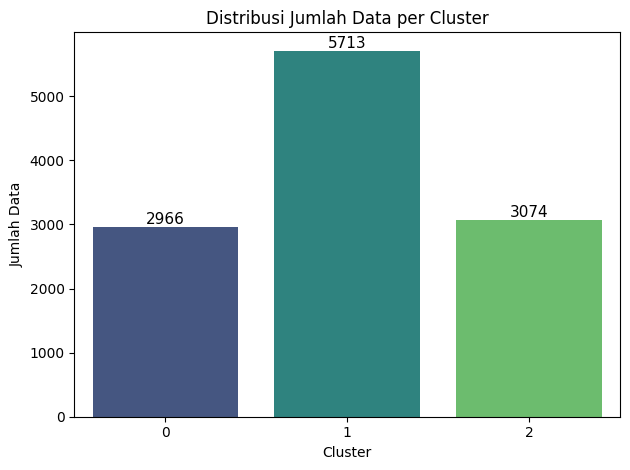

In [130]:
ax = sns.countplot(x='cluster', data=umkm_final, palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()

## **Evaluation**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


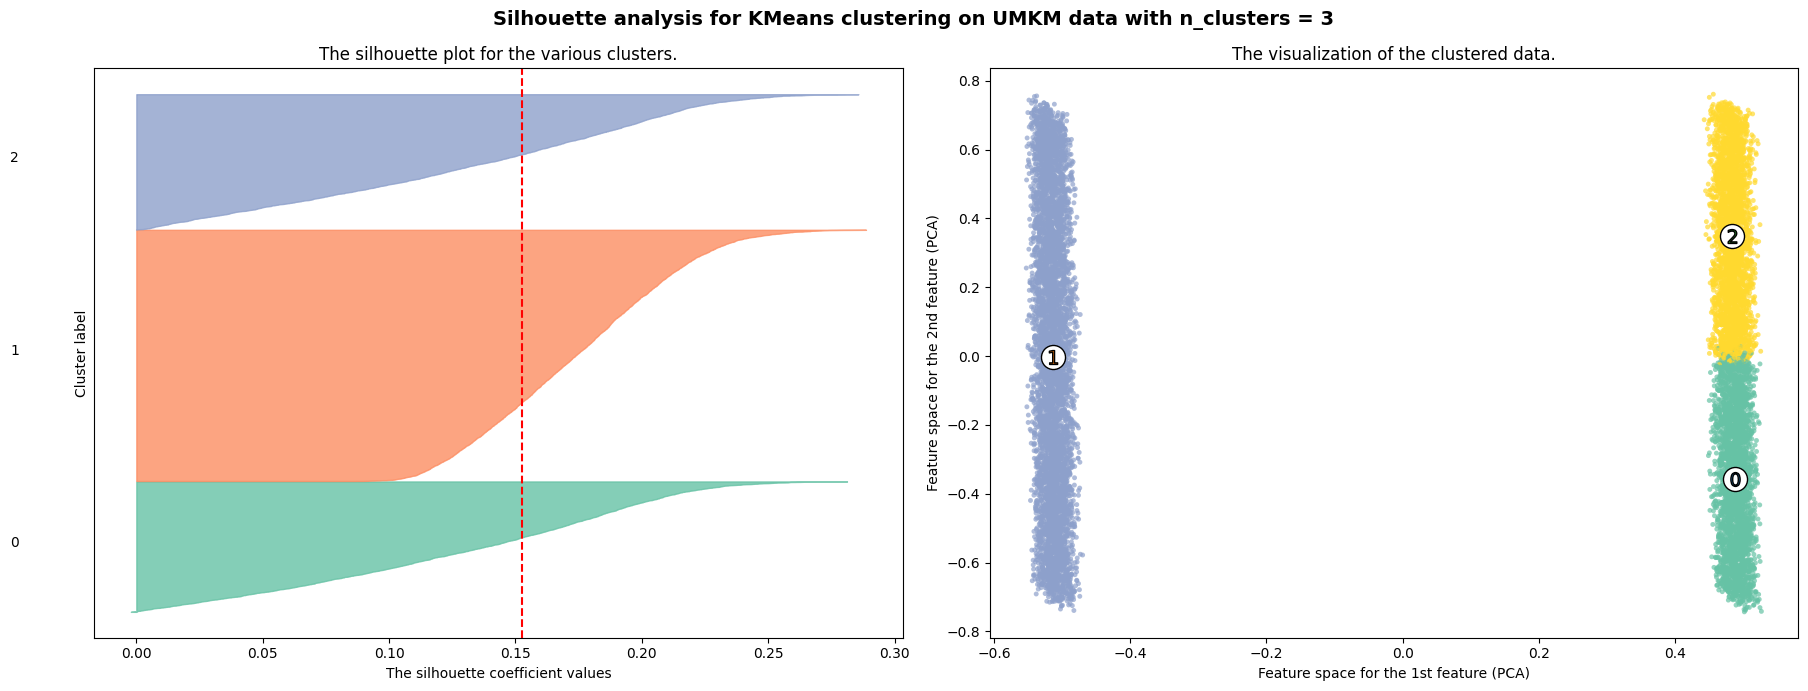

In [131]:
n_clusters = 3
cluster_labels = umkm_final["cluster"].values

# Silhouette score per sample
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

# Silhouette Plot
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.Set2(i)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.8)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_yticks([])

# Scatter plot of clusters (PCA 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
colors = plt.cm.Set2(cluster_labels.astype(float)/n_clusters)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=50, lw=0, alpha=0.7, c=colors)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
centers_2d = pca.transform(kmeans.cluster_centers_)
for i, c in enumerate(centers_2d):
    ax2.scatter(c[0], c[1], marker='o', c='white', alpha=1, s=300, edgecolor='k')
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=100, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature (PCA)")
ax2.set_ylabel("Feature space for the 2nd feature (PCA)")

plt.suptitle(f"Silhouette analysis for KMeans clustering on UMKM data with n_clusters = {n_clusters}",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


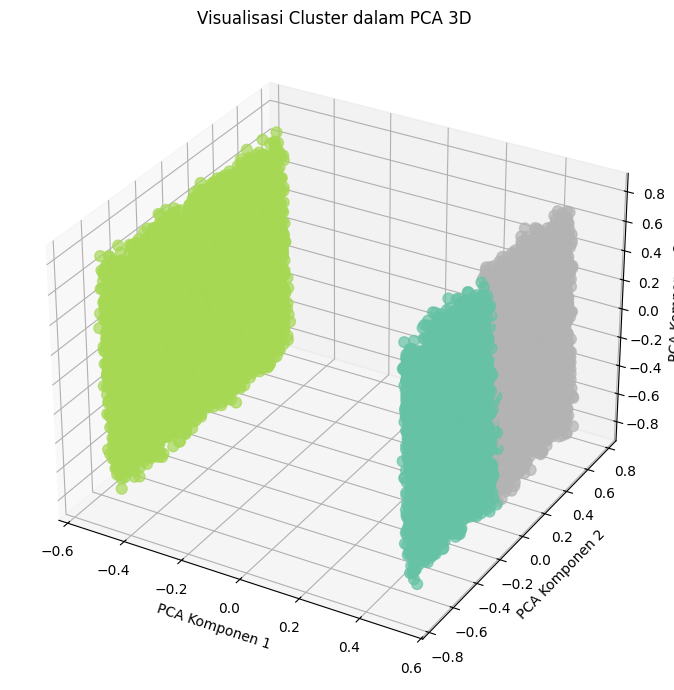

In [132]:
n_clusters = len(np.unique(cluster_labels))

# PCA ke 3 komponen
pca_3d = PCA(n_components=3, random_state=42)
X_pca3 = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.Set2(cluster_labels.astype(float) / n_clusters)
scatter = ax.scatter(
    X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
    c=cluster_labels, cmap='Set2', s=60, alpha=0.7
)

# Plot centroid KMeans pada ruang PCA 3D
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
centers_3d = pca_3d.transform(kmeans.cluster_centers_)
for i, c in enumerate(centers_3d):
    ax.scatter(c[0], c[1], c[2], marker='o', c='white', s=300, edgecolor='k')
    ax.text(c[0], c[1], c[2], str(i), fontsize=16, weight='bold', color='k')

ax.set_title("Visualisasi Cluster dalam PCA 3D")
ax.set_xlabel('PCA Komponen 1')
ax.set_ylabel('PCA Komponen 2')
ax.set_zlabel('PCA Komponen 3')
plt.tight_layout()
plt.show()

### Interpretasi Hasil Cluster (Profil & Rekomendasi)

In [133]:
# Profil tiap cluster (statistik deskriptif)
cluster_profiles = umkm_final.groupby('cluster')[fitur_clustering].agg(['mean', 'median', 'min', 'max', 'count'])
display(cluster_profiles)

# Komposisi kategori tiap cluster
for cat in ['jenis_usaha', 'marketplace', 'status_legalitas']:
    print(f'\nDistribusi {cat} per cluster:')
    display(pd.crosstab(umkm_final['cluster'], umkm_final[cat], normalize='index').style.format("{:.2%}"))

# Rekomendasi berbasis profil cluster
for cl in sorted(umkm_final['cluster'].unique()):
    cluster_data = umkm_final[umkm_final['cluster'] == cl]
    print(f"\nCluster {cl}:")
    print(f"Jumlah UMKM: {len(cluster_data)}")
    print(f"Rata-rata aset: {cluster_data['aset'].mean():.2f}")
    print(f"Rata-rata omset: {cluster_data['omset'].mean():.2f}")
    print(f"Dominan jenis usaha: {cluster_data['jenis_usaha'].mode()[0]}")
    print(f"Dominan marketplace: {cluster_data['marketplace'].mode()[0]}")
    print(f"Status legalitas dominan: {cluster_data['status_legalitas'].mode()[0]}")

    if cluster_data['aset'].mean() < 0.3:
        print("Rekomendasi: Prioritaskan bantuan modal & pelatihan manajemen keuangan.")
    elif cluster_data['omset'].mean() > 0.7:
        print("Rekomendasi: Fasilitasi akses pasar ekspor atau scale-up.")


tenaga_kerja_perempuan                            \
                          mean    median  min  max count   
cluster                                                    
0                     0.504553  0.515152  0.0  1.0  2966   
1                     0.503015  0.505051  0.0  1.0  5713   
2                     0.495863  0.484848  0.0  1.0  3074   

        tenaga_kerja_laki_laki                            ... marketplace  \
                          mean    median  min  max count  ...        mean   
cluster                                                   ...               
0                     0.495869  0.484848  0.0  1.0  2966  ...    0.487862   
1                     0.496035  0.494949  0.0  1.0  5713  ...    0.502407   
2                     0.497460  0.494949  0.0  1.0  3074  ...    0.511386   

                               status_legalitas                         
        median  min  max count             mean median  min  max count  
cluster                                                                 
0          0.5  0.0  1.0  2966              1.0    1.0  1.0  1.0  2966  
1          0.5  0.0  1.0  5713              0.0    0.0  0.0  0.0  5713  
2          0.5  0.0  1.0  3074              1.0    1.0  1.0  1.0  3074  

[3 rows x 60 columns]


Distribusi jenis_usaha per cluster:


jenis_usaha,0.000000,0.166667,0.333333,0.500000,0.666667,0.833333,1.000000
cluster,,,,,,,
0,0.27%,26.94%,24.75%,0.34%,22.83%,24.61%,0.27%
1,0.16%,25.15%,24.59%,0.14%,24.51%,25.15%,0.30%
2,0.20%,24.53%,23.36%,0.33%,24.50%,26.81%,0.29%



Distribusi marketplace per cluster:


marketplace,0.000000,0.250000,0.500000,0.750000,1.000000
cluster,,,,,
0,20.94%,20.87%,19.96%,18.58%,19.66%
1,20.11%,19.92%,19.43%,19.97%,20.57%
2,19.06%,19.97%,19.94%,19.39%,21.63%



Distribusi status_legalitas per cluster:


status_legalitas,0.000000,1.000000
cluster,,
0,0.00%,100.00%
1,100.00%,0.00%
2,0.00%,100.00%



Cluster 0:
Jumlah UMKM: 2966
Rata-rata aset: 0.51
Rata-rata omset: 0.49
Dominan jenis usaha: 0.16666666666666666
Dominan marketplace: 0.0
Status legalitas dominan: 1.0

Cluster 1:
Jumlah UMKM: 5713
Rata-rata aset: 0.49
Rata-rata omset: 0.51
Dominan jenis usaha: 0.16666666666666666
Dominan marketplace: 1.0
Status legalitas dominan: 0.0

Cluster 2:
Jumlah UMKM: 3074
Rata-rata aset: 0.49
Rata-rata omset: 0.50
Dominan jenis usaha: 0.8333333333333333
Dominan marketplace: 1.0
Status legalitas dominan: 1.0


### Validasi K yang Lebih Komprehensif

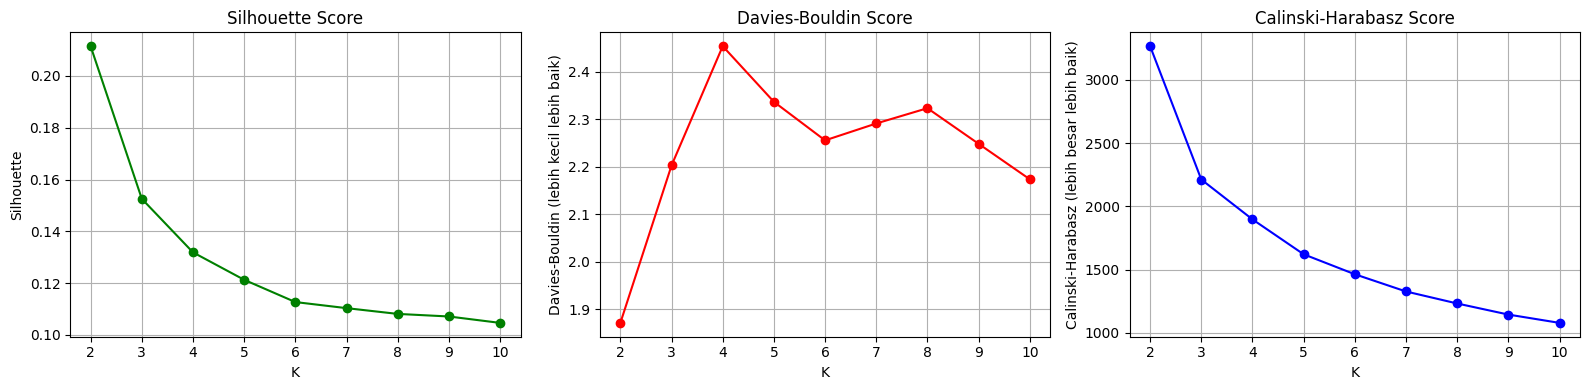

In [134]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('K'); plt.ylabel('Silhouette')
plt.title('Silhouette Score')
plt.grid(True)
plt.subplot(1,3,2)
plt.plot(K_range, davies_bouldin_scores, 'ro-')
plt.xlabel('K'); plt.ylabel('Davies-Bouldin (lebih kecil lebih baik)')
plt.title('Davies-Bouldin Score')
plt.grid(True)
plt.subplot(1,3,3)
plt.plot(K_range, calinski_scores, 'bo-')
plt.xlabel('K'); plt.ylabel('Calinski-Harabasz (lebih besar lebih baik)')
plt.title('Calinski-Harabasz Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Penjelasan:

*   Silhouette score: Semakin tinggi, semakin baik.
*   Davies-Bouldin Score: Semakin rendah, semakin baik.
*   Calinski-Harabasz Score: Semakin tinggi, semakin baik.



### Visualisasi Insight Bisnis

Heatmap rata-rata fitur per cluster

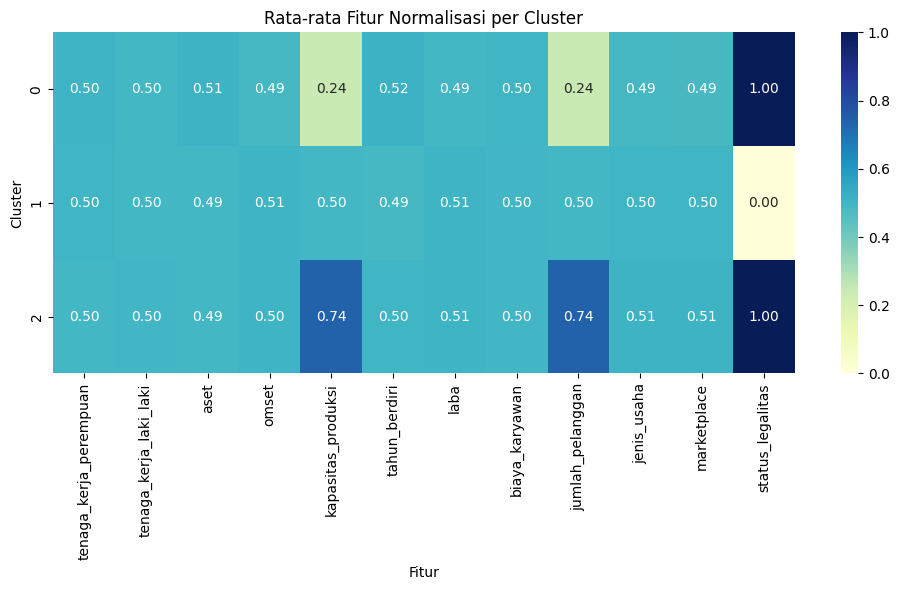

In [135]:
cluster_means = umkm_final.groupby('cluster')[fitur_clustering].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Rata-rata Fitur Normalisasi per Cluster")
plt.xlabel("Fitur")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

Pairplot untuk fitur penting

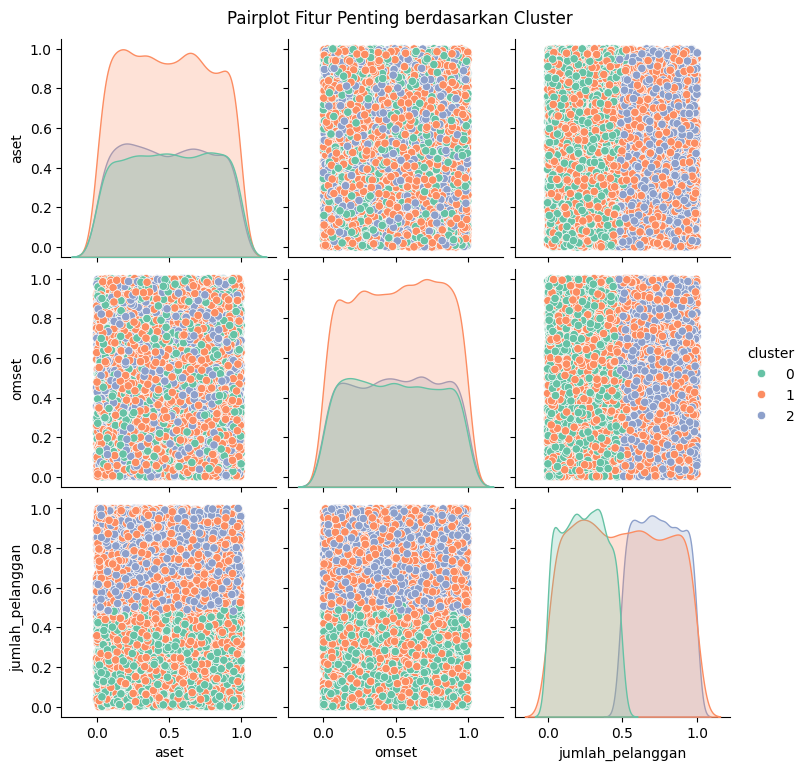

In [136]:
sns.pairplot(umkm_final, vars=['aset', 'omset', 'jumlah_pelanggan'], hue='cluster', palette='Set2')
plt.suptitle("Pairplot Fitur Penting berdasarkan Cluster", y=1.02)
plt.show()

## **Kesimpulan Akhir**

Proyek segmentasi UMKM dengan K-Means telah berjalan sistematis, mulai dari pemahaman bisnis, eksplorasi dan pembersihan data, pemodelan, evaluasi.
Cluster yang dihasilkan dapat membantu pemerintah atau lembaga terkait dalam merancang kebijakan yang lebih tepat sasaran sesuai kebutuhan nyata pelaku UMKM di lapangan.

Seluruh data UMKM berhasil dikelompokkan menjadi tiga cluster utama dengan karakteristik yang berbeda-beda. Setiap cluster merepresentasikan profil UMKM yang unik, sehingga dapat menjadi dasar bagi pemerintah atau lembaga terkait untuk merancang strategi intervensi yang lebih terarah dan efektif.

Cluster 0 terdiri dari UMKM yang memiliki aset besar namun omset relatif kecil, serta memiliki jumlah tenaga kerja yang cukup banyak. Sebagian besar UMKM pada cluster ini merupakan usaha yang baru berdiri, didominasi oleh jenis usaha dan marketplace pada kode 0, dan mayoritas belum memiliki legalitas resmi. Kelompok ini berpotensi untuk berkembang lebih lanjut, namun membutuhkan dukungan dalam hal peningkatan pemasaran, digitalisasi usaha, dan fasilitasi proses legalitas agar aset yang besar dapat dioptimalkan menjadi pendapatan yang lebih baik.

Cluster 1 berisi UMKM dengan aset yang kecil tetapi mampu menghasilkan omset yang besar, serta memiliki tenaga kerja yang banyak. Umumnya, UMKM pada cluster ini sudah berdiri cukup lama, didominasi jenis usaha kode 0, marketplace kode 1, dan sebagian besar juga belum legal. UMKM pada cluster ini telah menunjukkan kemampuan manajemen usaha yang baik. Oleh sebab itu, intervensi yang tepat untuk kelompok ini adalah fasilitasi legalitas serta dukungan ekspansi pasar dan peningkatan kapasitas produksi.

Cluster 2 mencakup UMKM dengan aset dan tenaga kerja yang sedikit, namun omsetnya besar. Sebagian besar merupakan UMKM yang relatif baru, didominasi jenis usaha kode 0 dan marketplace kode 1, serta mayoritas belum legal. Kelompok ini menunjukkan efisiensi dalam menghasilkan omset meski sumber daya terbatas. Program inkubasi, pelatihan manajemen usaha, serta fasilitasi legalitas sangat dianjurkan untuk membantu UMKM pada cluster ini berkembang lebih optimal.

Berdasarkan analisis segmentasi UMKM yang dilakukan, diperoleh beberapa temuan penting yang dapat menjadi dasar rekomendasi kebijakan. Pada tahap awal, data menunjukkan bahwa jenis usaha seperti perdagangan, jasa, kesehatan, dan pendidikan mendominasi populasi UMKM, masing-masing dengan proporsi sekitar seperempat dari total data. Namun, besarnya jumlah UMKM dalam suatu jenis usaha tidak serta-merta menjamin tingkat keuntungan (laba) atau omzet yang tinggi pada kelompok tersebut.

Dari proses eksplorasi dan visualisasi data, terlihat bahwa setiap kategori usaha memiliki karakteristik aset, omzet, dan jumlah tenaga kerja yang sangat beragam. Ada UMKM di bidang yang banyak jumlahnya, namun ternyata aset atau omzet rata-ratanya relatif kecil, demikian pula sebaliknya. Hal ini menunjukkan bahwa peluang dan tantangan tiap sektor bisnis sangat bervariasi, sehingga strategi pengembangan tidak bisa disamaratakan.

Proses segmentasi menggunakan K-Means menghasilkan tiga cluster utama dengan karakteristik yang berbeda. Misalnya, terdapat kelompok UMKM yang meskipun jumlahnya banyak di kategori tertentu, ternyata dominasinya ada pada cluster dengan profit atau omzet lebih kecil. Sebaliknya, ada juga kelompok UMKM dengan jumlah lebih sedikit namun mampu menghasilkan omzet besar dengan sumber daya yang terbatas.